In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
# (x_i, y_i)
#data = np.array([ [2, 3], [5, 4], [9, 6], [4, 7], [8, 1], [7, 2] ])
data = np.array([ [3, 6], [7, 11], [2, 8], [9, 10], [1, 4], [4, 6], [8, 12] ])

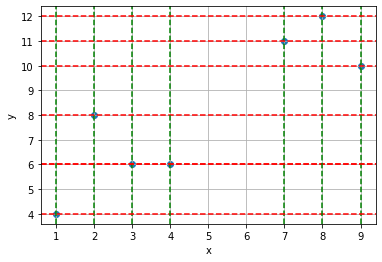

In [3]:
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(data[:, 0], data[:, 1])

for idx in range(data.shape[0]):
    plt.axvline(x=data[idx][0], color='green', linestyle='--')
    plt.axhline(y=data[idx][1], color='red', linestyle='--')

In [24]:
# We start off with the x-axis (find median x), depth=1 -> d=1 : x, d=2 : y, d=3 : x etc.
# Another strategy is to keep track the depth: vertical split for even depth and horizontal split for odd depth, instead of
# tracking the axis and switching it

class kdtree:
    def __init__(self, coords, axis):
        self.coords = coords
        self.axis = axis
        
        self.left = None
        self.right = None
        
    def insert(self, coords, axis):
        print(f'{self.axis} : {coords} versus {self.coords}')
        
        if coords[self.axis] < self.coords[self.axis]:
            if self.left is None:
                print('left')
                axis = int(not axis)
                self.left = kdtree(coords, axis)
            else:
                print('next left')
                self.left.insert(coords, axis)
        else:
            if self.right is None:
                print('right')
                axis = int(not axis)
                self.right = kdtree(coords, axis)
            else:
                print('next right')
                self.right.insert(coords, axis)
    
    # I need to add a query bbox for near points
    def find(self, query_pnt, axis):
        print(f'{self.axis} : {query_pnt} versus {self.coords}')
        
        if query_pnt[self.axis] < self.coords[self.axis]:
            if self.left is None:
                print(f'Found in left: { self }')
                return self.coords
            else:
                print('next left')
                return self.left.find(query_pnt, axis)
        else:
            if self.right is None:
                print(f'Found in right: { self }')
                return self.coords
            else:
                print('next right')
                return self.right.find(query_pnt, axis)
    
    def __str__(self):
        return f'{str(self.coords)} -> ({str(self.left)}, {str(self.right)})'

In [25]:
axis = 0
indices = np.argsort(data[:, axis], kind='heapsort')
sorted_data = data[indices]
mid_idx = int(0.5 * len(sorted_data))
coords = sorted_data[mid_idx]

tree = kdtree(coords, axis)

sorted_data = np.concatenate((sorted_data[: mid_idx], sorted_data[mid_idx + 1 :]))

while len(sorted_data) > 0:
    print('')
    indices = np.argsort(sorted_data[:, axis], kind='heapsort')
    
    sorted_data = sorted_data[indices]
    
    mid_idx = int(0.5 * len(sorted_data))
    
    tree.insert(sorted_data[mid_idx], axis)
    
    sorted_data = np.concatenate((sorted_data[: mid_idx], sorted_data[mid_idx + 1 :]))
    
    axis = int(not axis)


0 : [ 7 11] versus [4 6]
right

0 : [2 8] versus [4 6]
left

0 : [ 8 12] versus [4 6]
next right
1 : [ 8 12] versus [ 7 11]
right

0 : [3 6] versus [4 6]
next left
0 : [3 6] versus [2 8]
right

0 : [ 9 10] versus [4 6]
next right
1 : [ 9 10] versus [ 7 11]
left

0 : [1 4] versus [4 6]
next left
0 : [1 4] versus [2 8]
left


In [26]:
print(tree)

[4 6] -> ([2 8] -> ([1 4] -> (None, None), [3 6] -> (None, None)), [ 7 11] -> ([ 9 10] -> (None, None), [ 8 12] -> (None, None)))


In [28]:
# Search for nearest point in eucledian space
query_pnt = [2, 8]
print('Naive closest pnt: ', tree.find(query_pnt, 0))

0 : [2, 8] versus [4 6]
next left
0 : [2, 8] versus [2 8]
next right
0 : [2, 8] versus [3 6]
Found in left: [3 6] -> (None, None)
Naive closest pnt:  [3 6]
